# Fitting Data with a Neural Network Trained Using Batch Training

This notebook provides you with a complete code example that loads the data contained in the `data_reg_2d_nonlinear.csv` file, trains a two-layer neural network to fit them with batch training, and finally uses the trained network to predict the values of the data in the file `data_reg_2d_nonlinear_test.csv`.

## Loading the Data

In [14]:
from loader import load_data

(x, y_gt) = load_data(filename="data_reg_2d_nonlinear.csv")

## Implementing a Dense Neural Network

Implement the sigmoidal function ...

In [15]:
from numpy import exp

def sigmoid(x):
    """Sigmoid function."""
    return 1 / (1 + exp(-x))

... implement a function to define the neural network ...

In [16]:
def dnn2_reg(wa, wb, x):
    """Two-layer dense neural network for classification."""
    return sigmoid(x @ wa) @ wb

... define the number of neurons in the first layer ...

In [17]:
num_neurons = 10

... randomly initialize its weights ...

In [18]:
from numpy.random import default_rng

rng = default_rng()
wa = rng.standard_normal(size=(2, num_neurons)) # Input weights layer 1.
wb = rng.standard_normal(size=(num_neurons, 1)) # Input weights layer 2.

... obtain its predictions for the input data ...

In [19]:
y_p = dnn2_reg(wa, wb, x)

... and plot its predictions.

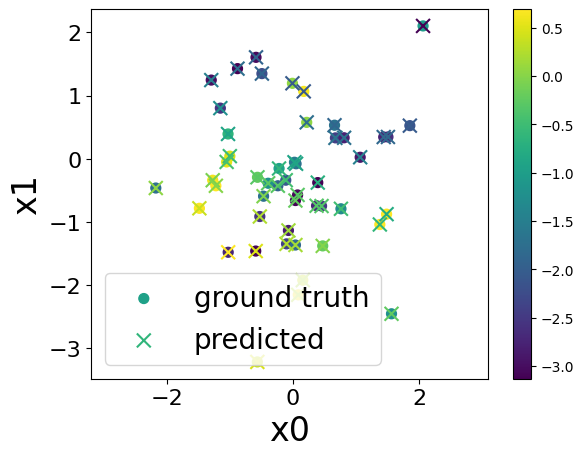

In [20]:
from plotting import plot_pred_2d

plot_pred_2d(x, y_gt, y_p=dnn2_reg(wa, wb, x))

## Plotting the Predictions Versus Ground Truth Values

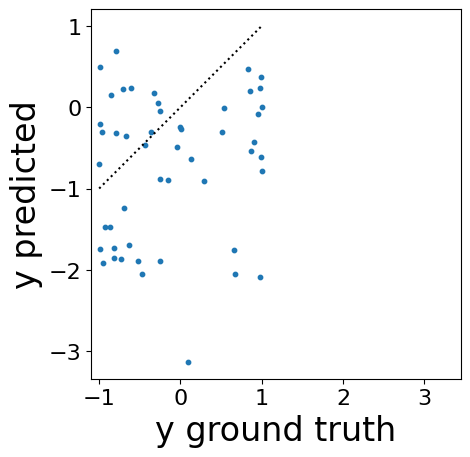

In [21]:
from plotting import plot_pred_vs_gt

plot_pred_vs_gt(y_gt, y_p=dnn2_reg(wa, wb, x))

## Training with Mini-Batches

Implement the first derivative of the sigmoid function ...

In [22]:
def d_sigmoid(x):
    """Derivative of sigmoid function."""
    return sigmoid(x) * (1 - sigmoid(x))

... implement the backpropagation algorithm with mini-batches ...

In [23]:
from numpy import mean, reshape, sum, transpose, zeros
from numpy.random import permutation

num_samples = len(x)
num_train_iterations = 10 ** 5
eta = .1  # Learning rate.
num_batches = 10
batch_size = int(num_samples / num_batches)
num_epochs = 10 ** 4

mse_train = zeros((num_epochs,))
for epoch in range(num_epochs):
    permuted_order_samples = permutation(num_samples)
    x_permuted = x[permuted_order_samples]
    y_gt_permuted = y_gt[permuted_order_samples]

    for batch_start in range(0, num_samples, batch_size):
        dwa = zeros(wa.shape)  # Initialize weight increments layer 1.
        dwb = zeros(wb.shape)  # Initialize weight increments layer 2.
        for selected in range(batch_start, batch_start + batch_size):
            x_selected = reshape(x_permuted[selected], (1, -1))
            y_gt_selected = reshape(y_gt_permuted[selected], (1, -1))

            # Detailed neural network calculation.
            x_selected_a = x_selected  # Input layer 1.
            p_a = x_selected_a @ wa  # Activation potential layer 1.
            y_selected_a = sigmoid(p_a)  # Output layer 1.

            x_selected_b = y_selected_a  # Input layer 2.
            p_b = x_selected_b @ wb  # Activation potential layer 2.
            y_selected_b = p_b  # Output neuron layer 2 (output neuron).

            y_p_selected = y_selected_b
            
            # Update weight increments.
            error = y_p_selected - y_gt_selected  # Calculate error.

            delta_b = error * 1
            dwb = dwb - eta * delta_b * transpose(x_selected_b)

            delta_a = sum(wb * delta_b, axis=1) * d_sigmoid(p_a)
            dwa = dwa - eta * delta_a * transpose(x_selected_a)

        wa = wa + dwa / batch_size  # Update weights layer 1.
        wb = wb + dwb / batch_size  # Update weights layer 2.

    y_p = dnn2_reg(wa, wb, x)
    mse_train[epoch] = mean((y_p - y_gt) ** 2)

    print(f"epoch={epoch} MSE = {mse_train[epoch]:.4f}")

epoch=0 MSE = 1.1278
epoch=0 MSE = 0.9070
epoch=0 MSE = 0.8816
epoch=0 MSE = 0.8744
epoch=0 MSE = 0.8425
epoch=0 MSE = 0.7561
epoch=0 MSE = 0.7525
epoch=0 MSE = 0.7493
epoch=0 MSE = 0.7184
epoch=0 MSE = 0.7239
epoch=1 MSE = 0.7106
epoch=1 MSE = 0.7297
epoch=1 MSE = 0.7071
epoch=1 MSE = 0.6754
epoch=1 MSE = 0.6311
epoch=1 MSE = 0.5853
epoch=1 MSE = 0.5883
epoch=1 MSE = 0.5830
epoch=1 MSE = 0.5792
epoch=1 MSE = 0.5709
epoch=2 MSE = 0.5645
epoch=2 MSE = 0.5598
epoch=2 MSE = 0.6206
epoch=2 MSE = 0.5705
epoch=2 MSE = 0.5736
epoch=2 MSE = 0.5530
epoch=2 MSE = 0.5538
epoch=2 MSE = 0.5456
epoch=2 MSE = 0.5482
epoch=2 MSE = 0.5563
epoch=3 MSE = 0.5606
epoch=3 MSE = 0.5615
epoch=3 MSE = 0.5932
epoch=3 MSE = 0.5678
epoch=3 MSE = 0.5496
epoch=3 MSE = 0.5559
epoch=3 MSE = 0.5391
epoch=3 MSE = 0.5477
epoch=3 MSE = 0.5439
epoch=3 MSE = 0.5276
epoch=4 MSE = 0.5409
epoch=4 MSE = 0.5296
epoch=4 MSE = 0.5403
epoch=4 MSE = 0.5264
epoch=4 MSE = 0.5322
epoch=4 MSE = 0.5333
epoch=4 MSE = 0.5414
epoch=4 MSE =

... and plot its predictions ...

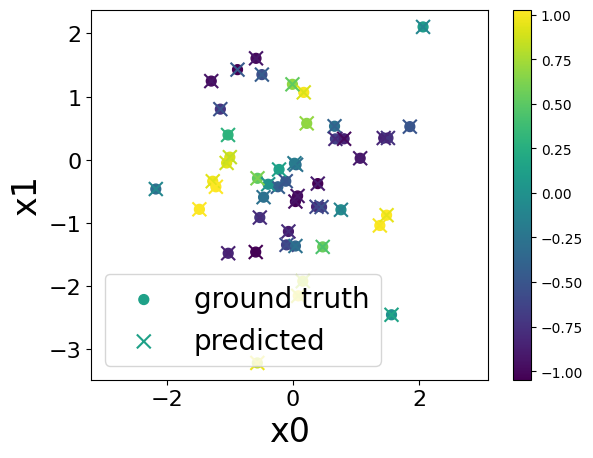

In [24]:
plot_pred_2d(x, y_gt, y_p=dnn2_reg(wa, wb, x))

... its predictions versus ground truth ...

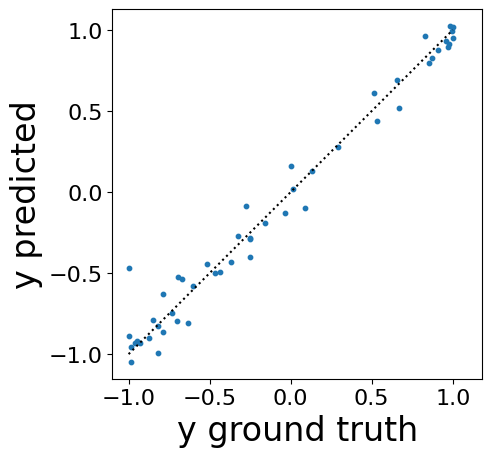

In [25]:
plot_pred_vs_gt(y_gt, y_p=dnn2_reg(wa, wb, x))

... and the training metrics.

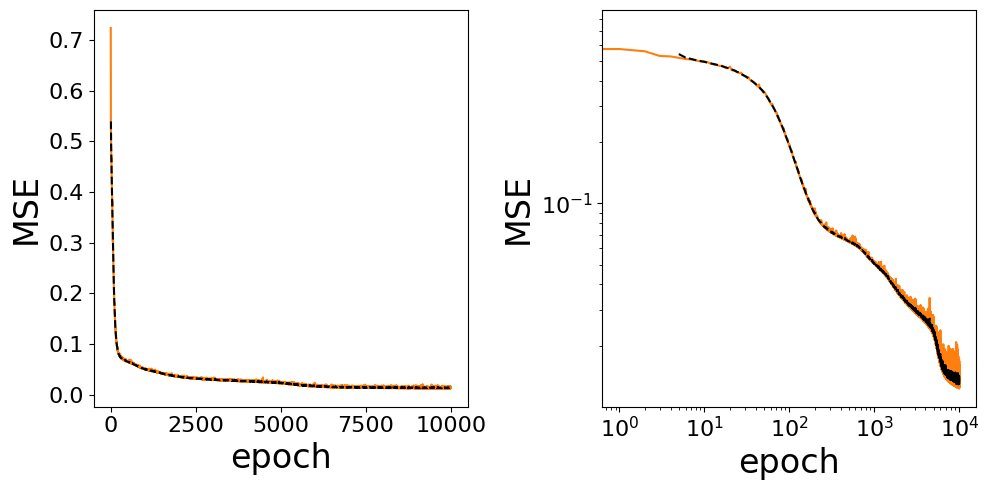

In [26]:
from plotting import plot_mse

plot_mse(mse_train, smooth=11)